In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import statsmodels.api as sm
#from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
nome_arq = 'Regress_ex1.xls'
df = pd.read_excel(nome_arq)
df.head(3)

,Funcionário,Tempo,Quantidade de clientes
0,Beto,2,48
1,Nivia,3,50
2,Bina,4,56


In [38]:
x_col = 'Tempo'
y_col = 'Quantidade de clientes'
X = df[x_col]
y = df[y_col]

In [39]:
df_quant = df.iloc[:,1:3]
df_quant.columns

Index(['Tempo', 'Quantidade de clientes'], dtype='object')

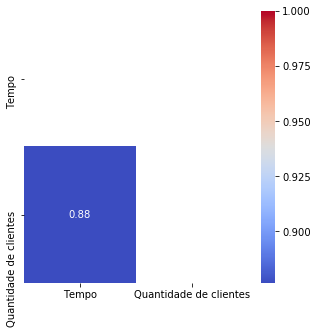

In [40]:
# matriz de correlação df_quant
fig, ax = plt.subplots(figsize=(5, 5)) 
mask = np.zeros_like(df_quant.corr().abs())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df_quant.corr().abs(), mask= mask, ax= ax, cmap='coolwarm', annot= True)

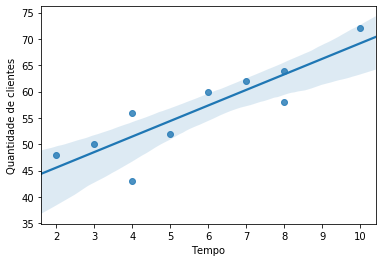

In [41]:
sns.regplot(x= X, y= y, data= df)

In [42]:
X = sm.add_constant(X)
model = sm.OLS(y, X)
modelfit = model.fit()
pred = modelfit.predict(X)
print(modelfit.summary())

                              OLS Regression Results                              
Dep. Variable:     Quantidade de clientes   R-squared:                       0.769
Model:                                OLS   Adj. R-squared:                  0.740
Method:                     Least Squares   F-statistic:                     26.60
Date:                    Wed, 22 Apr 2020   Prob (F-statistic):           0.000867
Time:                            23:53:51   Log-Likelihood:                -27.805
No. Observations:                      10   AIC:                             59.61
Df Residuals:                           8   BIC:                             60.21
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

Text(0.5, 1.0, 'Linear Regression')

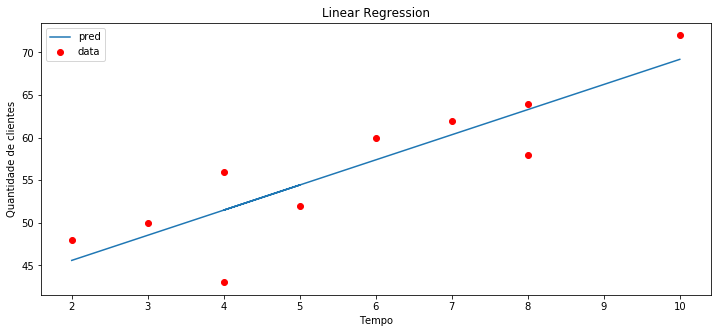

In [45]:
fig, ax = plt.subplots(figsize=(12,5))
ax.scatter(x= df[x_col], y= df[y_col], marker= 'o', label= 'data', color= 'red')
ax.plot(df[x_col], pred, label= 'pred')
ax.legend()
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_title('Linear Regression')